# Exercise 1 - Terminology

Describe the following terms with your own words:

***Type:*** 

***Default parameter:*** 


Answer the following questions:

***Give different examples of usages of square brackets `[]`, describe two completely different ones!***

**What are the differences between `float`, `int` and `str`?**

***Give different examples of usages of round brackets `()` in Python, describe at least three completely different ones! (Bonus: give a fourth example not covered in the lecture until now!)***

In [1]:
### BEGIN SOLUTION

***Type:*** In Python every value (object) has a type. It determines how the value is stored internally and which operations are valid on it.

***Default parameter:*** A default parameter is a predefined value for a function argument. When the function is called, this argument can be omitted and the default value is used.


Answer the following questions:

**What are the differences between `float`, `int` and `str`?**

`int` stores whole numbers (e.g., 1, 2, 3). float stores decimal numbers. `str` stores text. Numeric types cannot store text, and strings cannot be used directly in calculations.

***Give different examples of usages of square brackets `[]`, describe two completely different ones!***

- definition of numpy arrays (via lists)
- accessing numpy elements

***Give different examples of usages of round brackets `()` in Python, describe at least three completely different ones! (Bonus: give a forth example not covered in the lecture until now!)***

- in a mathematical formula
- function call
- function definition

Advanced:
- tuples
- class inheritance

Fun:
- As a string in plain text: `print("Hello friends - (except you Bob)")`

In [2]:
### END SOLUTION

# Exercise 2 - Fibonacci numbers

Write a function `fibonacci(n)` which calculates the n-th [Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number), defined by $f(0)=0$, $f(1)=1$ and $f(n) = f(n-1)+f(n-2)$.

Use the function to calculate $f(36)$.

**Note**: There are many different solutions. There are solutions which use only Python techniques covered in the lecture so far (others may use more advanced parts of Python). Finding one solution is good enough, but if you can find more and compare them - that would be great! In which aspects do they differ? If you need some inspiration, you might want to read [this chapter about recursion](https://greenteapress.com/thinkpython2/html/thinkpython2006.html#sec62), but carefully consider whether this actually is a misleading or a helpful hint.

**Warning:** This exercise is tricky on purpose.

In [3]:
### BEGIN SOLUTION

In [4]:
# exponential runtime, will be very slow!
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-2) + fibonacci(n-1)

[fibonacci(i) for i in range(8)]

fibonacci(36)

14930352

In [5]:
%%timeit -n 1 -r 1
fibonacci(36)

3.35 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [6]:
# store all Fibonacci numbers in a list, requires more RAM
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    
    fibonacci_numbers = [0] * (n + 1)
    fibonacci_numbers[1] = 1
    
    for i in range(2, n + 1):
        fibonacci_numbers[i] = fibonacci_numbers[i-2] + fibonacci_numbers[i-1]
        
    return fibonacci_numbers[-1]

[fibonacci(i) for i in range(8)]

[0, 1, 1, 2, 3, 5, 8, 13]

In [7]:
%%timeit -n 1 -r 1
fibonacci(36)

18.8 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
# elegant pythonic way to just use the last two values
def fibonacci(n):
    previous, value = 0, 1
    
    for i in range(n):
        previous, value = value, previous + value
        
    return previous

[fibonacci(i) for i in range(8)]

[0, 1, 1, 2, 3, 5, 8, 13]

In [9]:
%%timeit -n 1 -r 1
fibonacci(36)

15.5 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
# there is actually a direct formula, no need for iterations... :)

from math import sqrt

def fibonacci(n):
    return int(((1+sqrt(5))**n-(1-sqrt(5))**n)/(2**n*sqrt(5)))

In [11]:
%%timeit -n 1 -r 1
fibonacci(36)

23.1 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
%%timeit -n 1 -r 1
fibonacci(36)

31.3 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [13]:
### END SOLUTION

In [14]:
# # # # # RUN THIS CELL TO CHECK YOUR RESULTS # # # # # 

from urllib.request import urlretrieve
import os.path
if not os.path.exists('check.py'):
    urlretrieve('https://raw.githubusercontent.com/inwe-boku/lecture-scientific-programming/refs/heads/main/check.py', filename='check.py')
from check import check_solution
check_solution([
    ("fibonacci(0)", 0),
    ("fibonacci(1)", 1),
    ("fibonacci(7)", 13)
], globals())

✅ 3 tests passed. Well done! 🎉


# Exercise 3 - Numerical derivative
Write a function `derivative(x, h, f)` which calculates the first numerical derivative of an arbitrary function $f(x)$. Use the formula $\frac{f(x + h) -f(x - h)}{2 h}$.

*Note:* in Python you can pass a function as an argument of another function!

Kahn Academy has a [nice video which explains how to take the derivative of a polynomial](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-1-new/ab-2-6b/v/differentiating-polynomials-example).

Test it using parameters $x = 4$, $h = 0.0001$ and the function `cubed`:

In [15]:
def cubed(x):
    return x**3

Then implement a function `cubed_prime(x)` using the symbolic derivative $f'(x) = 3\cdot x^2$ of $f(x)=x^3$. Test it using $x=4$ again and explain the result. _prime_ is symbol ', so `f'(x)` is pronounced _f prime_.

In [16]:
### BEGIN SOLUTION

In [17]:
def derivative(x, h, f):
    return (f(x+h) - f(x - h)) / (2 * h)

derivative(4, 0.0001, cubed)

48.000000010013366

In [18]:
def cubed_prime(x):
    return 3 * x**2

cubed_prime(4)

48

In [19]:
### END SOLUTION

In [20]:
# # # # # RUN THIS CELL TO CHECK YOUR RESULTS # # # # # 

from urllib.request import urlretrieve
import os.path
if not os.path.exists('check.py'):
    urlretrieve('https://raw.githubusercontent.com/inwe-boku/lecture-scientific-programming/refs/heads/main/check.py', filename='check.py')
from check import check_solution
check_solution([
    (f"cubed_prime({x}) - derivative({x}, 0.0001, cubed) < 1e-5", True)
    for x in (4, 17, -3)
], globals())

✅ 3 tests passed. Fantastic! 🚀


# Exercise 4 - Track Austrian solar PV deployment

In this exercise, you will plot the deployment of solar PV in the years 2016 - 2024 in Austria and you will additionally show the plan until 2030, as put forward by the EAG (the Austrian renewable energy law). Below, you will find the variable `pv_production_at_2016_2024_twh` which reports the PV generation in the years 2016 to 2024. First, plot the years against historic production, i.e. plot a time series of the historic production.

Until 2030, Austria plans to increase yearly solar generation by 11TWh per year by installing addition PV capacity (see [§ 4 Abs. 4 Erneuerbaren-Ausbau-Gesetz](https://www.ris.bka.gv.at/GeltendeFassung.wxe?Abfrage=Bundesnormen&Gesetzesnummer=20011619)). Assume that in each year in the period 2021 - 2030 PV generation is increased by the same amount and the goal of additional 11TWh/year is reached in 2030. Calculate the yearly increase in PV production and store it in the variable `yearly_addition_twh`. Then create a timeseries `pv_production_at_2020_2030_twh` with the PV generation in the year 2020 and the projected generation for the years 2021 to 2030. Plot this timeseries in the same plot as the historic generation data before!

What does the plot tell you about the speed of increase in installed PV capacity in Austria?

**Bonus question:** Discuss with fellow students if this plot could be done using MS Excel (or LibreOffice Calc)! List advantages and disadvantages!

In [21]:
import numpy as np

years_data = np.arange(2016, 2025)

# Data source: 2016-2019: https://www.e-control.at/statistik/e-statistik/data
# Data source: 2020-2024: https://energie.gv.at/energiewende/wie-ist-der-stand-zur-erneuerbaren-stromerzeugung-in-den-bundeslaendern
# Data source, not used atm: https://transparency.entsoe.eu
#                                          2016  2017  2018  2019  2020  2021  2022  2023  2024
pv_production_at_2016_2024_twh = np.array([1.03, 1.19, 1.37, 1.61, 2.04, 2.78, 3.79, 6.89, 8.14,])


# Source: Bundesgesetz über den Ausbau von Energie aus erneuerbaren Quellen (Erneuerbaren-Ausbau-Gesetz – EAG), §4(4)
additional_generation_2030_twh = 11

In [22]:
### BEGIN SOLUTION

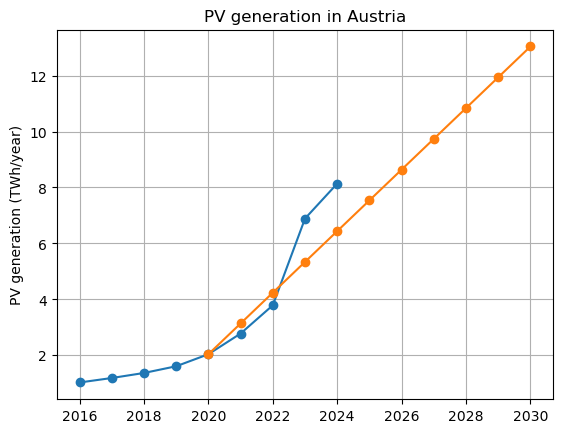

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(years_data, pv_production_at_2016_2024_twh, 'o-')

pv_production_at_2020_twh = pv_production_at_2016_2024_twh[4]

# According to the EAG law, we need 11TWh/year more than in 2020. We have 10 years time to increase PV generation.
years_until_goal = 10  # 2021-2030
yearly_addition_twh = additional_generation_2030_twh / years_until_goal

pv_production_at_2020_2030_twh = pv_production_at_2020_twh + (np.arange(0, 11)) * yearly_addition_twh

years_future = np.arange(2020, 2031)

plt.grid()
plt.plot(years_future, pv_production_at_2020_2030_twh, 'o-')
plt.title('PV generation in Austria')
plt.ylabel('PV generation (TWh/year)');

This is not asked in the exercise, but heelps to see to keep track of installation pace: if Austria is generating 1.1TWh more than the previous year, we are on a good track:

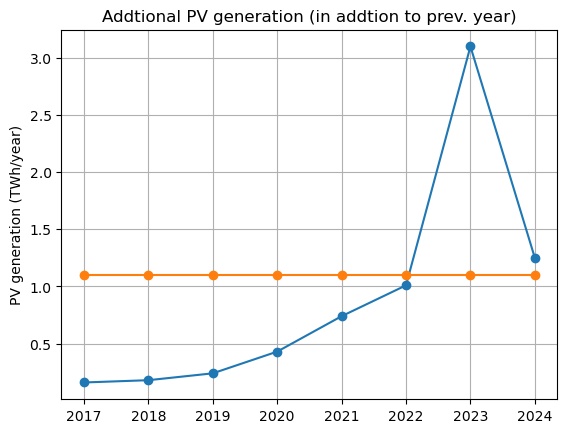

In [24]:
plt.grid()
plt.title('Addtional PV generation (in addtion to prev. year)')
plt.ylabel('PV generation (TWh/year)');
plt.plot(years_data[1:], np.diff(pv_production_at_2016_2024_twh), 'o-')
plt.plot(years_data[1:], np.ones(len(years_data) - 1) * yearly_addition_twh, 'o-');

In [25]:
### END SOLUTION

In [26]:
# # # # # RUN THIS CELL TO CHECK YOUR RESULTS # # # # # 

from urllib.request import urlretrieve
import os.path
if not os.path.exists('check.py'):
    urlretrieve('https://raw.githubusercontent.com/inwe-boku/lecture-scientific-programming/refs/heads/main/check.py', filename='check.py')
from check import check_solution
check_solution([
    ("yearly_addition_twh", 1.1),
    ("pv_production_at_2020_2030_twh[3]", 5.34)
], globals())

✅ 2 tests passed. Great! 👌


# Exercise 5 - Mean of random numbers (optional bonus exercise, expert level)

Generate 30 random values between 0 and 1 (uniformly distributed) and plot them. Then calculate the mean value of the first i values for $i=1,\ldots,30$ and plot this list too (in the same figure).

That means there are two lines to plot with 30 data points each. The first line consists of random distributed y-values between 0 and 1 with x-values from 1 to 30. The data series is built by calculating the average of all previous values of the first line.

To solve the exercise find out how to generate random values with Numpy! How did you find an answer? Which possible ways are there? List at least ***2 to 5 different ways*** to look up what a numpy function does!

This exercise is inspired by the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers).

**Note:** To solve this exercise, a list comprehension is necessary (which will not be covered in this lecture). Pure Numpy is faster than using Python loops and list comprehensions, but this problem is not easily solvable by pure Numpy. Here, you can actually mix Numpy and list comprehensions. This is a pretty rare case in real life - in most cases you'll need either Numpy or list comprehensions.

In [27]:
### BEGIN SOLUTION

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
N = 30
np.random.seed(42)
random_values = np.random.rand(N)

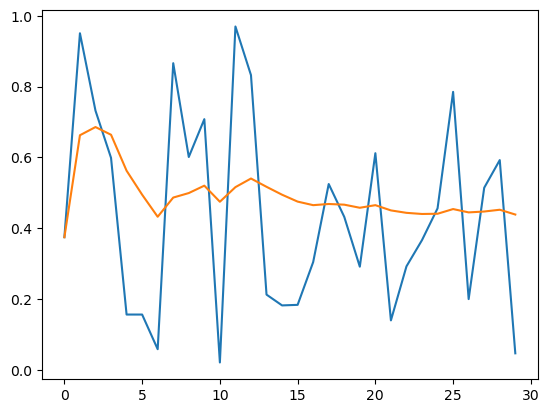

In [30]:
plt.plot(random_values, '-')
plt.plot([random_values[:i].mean() for i in range(1, N + 1)], '-')

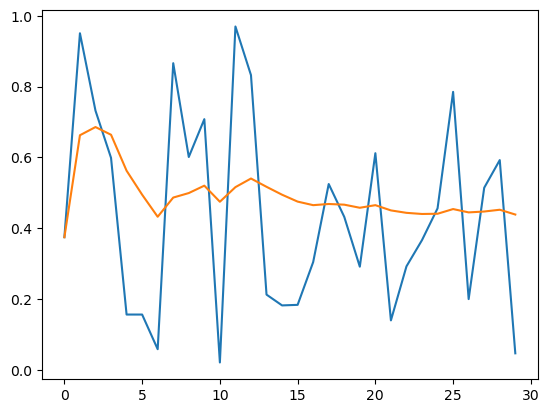

In [31]:
plt.plot(random_values, '-')
plt.plot(random_values.cumsum() / np.arange(1, N + 1), '-')

Where to find documentation:

 - Google it!
 - https://numpy.org/doc/stable/reference/index.html
 - in Jupyter: np.mean?
 - use an IDE which shows help texts
 - Stackoverflow
 - read a book
 - in the source code
 - ask somebody who knows stuff :)

In [32]:
### END SOLUTION